In [66]:
import pandas as pd
import numpy as np

# Импортируем файл и убедимся в его целостности

In [7]:
df = pd.read_excel('C:/Users/anton/OneDrive/Рабочий стол/Учеба 3 курс, 5 семестр/Выборка и Оценка рисков/Автострахование.xlsx', sheet_name = 'Условие')

In [8]:
df

,STATE,CLASS,GENDER,AGE,PAID,М,Ж,Unnamed: 7,Данные американской страховой компании по выплатам по автострахованию,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,STATE 14,C6,M,97.0,1134.44,1134.44,0.00,NaN,NaN,NaN,NaN,NaN
1,STATE 15,C6,M,96.0,3761.24,3761.24,0.00,NaN,STATE,Код штата,NaN,NaN
2,STATE 15,C11,M,95.0,7842.31,7842.31,0.00,NaN,CLASS,Рисковый класс (учтен ряд факторов по методике...,NaN,NaN
3,STATE 15,F6,F,95.0,2384.67,0.00,2384.67,NaN,GENDER,"Пол (M - мужчины, F - женщины)",NaN,NaN
4,STATE 15,F6,M,95.0,650.00,650.00,0.00,NaN,AGE,Возраст,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7430,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
7431,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
7432,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
7433,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN


In [39]:
#Отсортируем наши данные, убрав строки с нуливыми значениями
df1 = df[df['STATE'].notna()]
df1 = df1[['STATE','PAID']]
df1

,STATE,PAID
0,STATE 14,1134.44
1,STATE 15,3761.24
2,STATE 15,7842.31
3,STATE 15,2384.67
4,STATE 15,650.00
...,...,...
6768,STATE 15,39.31
6769,STATE 02,35.00
6770,STATE 17,27.46
6771,STATE 01,25.00


**Задача 3.2**. На основе однофакторного дисперсионного анализа проверить, отличаются ли средние выплаты по различным штатам. Обсудить тип данных о географическом распределении и предложить оценки средних выплат с учетом (возможной) дифференциации по данному признаку

In [50]:
states_list = sorted(df1.STATE.unique())
print(states_list)

['STATE 01', 'STATE 02', 'STATE 03', 'STATE 04', 'STATE 06', 'STATE 07', 'STATE 10', 'STATE 11', 'STATE 12', 'STATE 13', 'STATE 14', 'STATE 15', 'STATE 17']


In [ ]:
#df1[df1.groupby('STATE 14', axis = 0)

In [54]:
State_df = []
for i in states_list:
    i = df1[df1['STATE'].isin([i])]
    State_df.append(i)
    print(i)

         STATE     PAID
31    STATE 01  2607.82
32    STATE 01  2402.00
37    STATE 01  1400.00
42    STATE 01   802.91
127   STATE 01   532.04
...        ...      ...
6636  STATE 01   738.11
6652  STATE 01   673.86
6699  STATE 01   436.91
6713  STATE 01   384.34
6771  STATE 01    25.00

[166 rows x 2 columns]
         STATE      PAID
10    STATE 02    414.00
16    STATE 02    654.00
26    STATE 02  11756.34
30    STATE 02   3746.15
41    STATE 02   1013.06
...        ...       ...
6726  STATE 02    350.00
6727  STATE 02    328.64
6752  STATE 02    209.70
6755  STATE 02    198.07
6769  STATE 02     35.00

[1122 rows x 2 columns]
         STATE     PAID
9     STATE 03   665.48
17    STATE 03   366.28
27    STATE 03  8693.25
54    STATE 03  1678.27
65    STATE 03   487.70
...        ...      ...
6728  STATE 03   327.68
6735  STATE 03   276.78
6736  STATE 03   271.14
6740  STATE 03   264.34
6758  STATE 03   175.00

[348 rows x 2 columns]
         STATE     PAID
23    STATE 04   438.04
24 

Фомрулы для рассчета Межгрупповой и Внутренней сумм квадратов отклонений
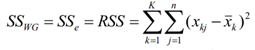
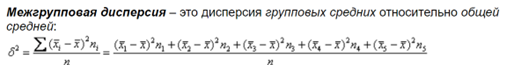

In [99]:
quantity = []
for i in State_df:
    n = i.shape[0]
    quantity.append(n)
print(f'Количество {quantity}\n')

average = []
for i in State_df:
    n = i['PAID'].mean()
    average.append(n)
print(f'Среднее значение {average}\n')

Dwg = []
for i in State_df:
    n = np.var(i['PAID'],ddof = 0)
    Dwg.append(n)
print(f'Внутригрупповая дисперсия {Dwg}\n')

SSwg = np.array(Dwg)*np.array(quantity)
print(f'Внутригрупповые квадраты отклоенений {SSwg}\n')

SUM_SSwg = sum(SSwg)
print(f'Внутригрупповая сумма квадратов отклонений {SUM_SSwg}\n')

Overall_Avarage = df1['PAID'].mean()
print(f'Общая средняя {Ovrall_Avarage}\n')



SSbg = list(map(lambda avg_i, n_i: (avg_i - Overall_Avarage)**2 * n_i, average, quantity))
print(f'Межгрупповые квадраты отклоенений:{SSbg}\n')
SUM_SSbg = sum(SSbg)
print(f'Межгрупповая сумма квадратов отклоенений:{SUM_SSbg}\n')

k = len(State_df)
print(f'Количество групп {k}\n')

n = df1.shape[0]
print(f'Объем выборки {n}')

    

Количество [166, 1122, 348, 666, 622, 269, 276, 9, 247, 208, 169, 2180, 491]

Среднее значение [1574.4642771084336, 1775.654331550802, 1830.09643678161, 1744.333663663664, 2089.6405787781373, 1942.7782527881043, 1886.4776449275357, 1682.7299999999998, 2384.733562753037, 2029.0900961538455, 1648.8995857988155, 1767.5199449541278, 2031.0490631364557]

Внутригрупповая дисперсия [3918033.7943136333, 5445533.595160919, 8926972.639323507, 7321253.260170663, 5938120.356486481, 16883453.47002781, 5305655.679573797, 1903811.667266667, 7182522.957825362, 9800228.720609602, 6867225.622314028, 5473552.7664622925, 12017434.785913164]

Внутригрупповые квадраты отклоенений [6.50393610e+08 6.10988869e+09 3.10658648e+09 4.87595467e+09
 3.69351086e+09 4.54164898e+09 1.46436097e+09 1.71343050e+07
 1.77408317e+09 2.03844757e+09 1.16056113e+09 1.19323450e+10
 5.90056048e+09]

Внутригрупповая сумма квадратов отклонений 47265475956.53659

Общая средняя 1853.0346567252336

Межгрупповые квадраты отклоенений:[1

In [107]:
print(f'Количество групп {k}\n')
print(f'Объем выборки {n}\n')
print(f'Общая средняя {Overall_Avarage}\n')
print(f'Внутригрупповая сумма квадратов отклонений {SUM_SSwg}\n')
print(f'Межгрупповая сумма квадратов отклоенений:{SUM_SSbg}\n')
Work_Table = pd.DataFrame({'STATES':states_list, 'Количество':quantity, 'Среднее занчение':average, 'Внутригрупповые квадраты отклоенений': SSwg, 'Межгрупповые квадраты отклоенений': SSbg})
Work_Table
Work_Table.style.set_table_attributes("style='display:inline'").set_caption('Таблица расчетов')

Количество групп 13

Объем выборки 6773

Общая средняя 1853.0346567252336

Внутригрупповая сумма квадратов отклонений 47265475956.53659

Межгрупповая сумма квадратов отклоенений:180028308.75333768



,STATES,Количество,Среднее занчение,Внутригрупповые квадраты отклоенений,Межгрупповые квадраты отклоенений
0,STATE 01,166,1574.464277,650393609.856063,12881841.762375
1,STATE 02,1122,1775.654332,6109888693.770552,6718215.920441
2,STATE 03,348,1830.096437,3106586478.484580,183104.353095
3,STATE 04,666,1744.333664,4875954671.273662,7869393.324453
4,STATE 06,622,2089.640579,3693510861.734591,34821029.382014
5,STATE 07,269,1942.778253,4541648983.437481,2166502.606226
6,STATE 10,276,1886.477645,1464360967.562368,308687.634932
7,STATE 11,9,1682.730000,17134305.005400,261033.084921
8,STATE 12,247,2384.733563,1774083170.582864,69827820.487777
9,STATE 13,208,2029.090096,2038447573.886797,6447067.692500


In [116]:
# Таблица однофакторного дисперсионного анализа 
Disp_analytic_table = pd.DataFrame({'Вариация':['Межгрупповая','Внутригрупповая', 'Общая'], 'Обозначение':['SSbg', 'SSwg', 'SStotal'], 'Суммы квадратов':[SUM_SSbg, SUM_SSwg,SUM_SSbg+SUM_SSwg], 'Степени свободы':['K-1', 'K(n-1)', 'K*n-1'], 'Значение степеней свободы':[13-1, 13*(6773-1), 13*6773-1], "Средний квадрат":[SUM_SSbg/(13-1),SUM_SSwg/(13*(6773-1)),(SUM_SSbg+SUM_SSwg)/(13*6773-1) ]}) 
Disp_analytic_table

,Вариация,Обозначение,Суммы квадратов,Степени свободы,Значение степеней свободы,Средний квадрат
0,Межгрупповая,SSbg,1.800283e+08,K-1,12,1.500236e+07
1,Внутригрупповая,SSwg,4.726548e+10,K(n-1),88036,5.368880e+05
2,Общая,SStotal,4.744550e+10,K*n-1,88048,5.388595e+05


In [127]:
M_bg = Disp_analytic_table.loc[0,'Средний квадрат']
M_sg = Disp_analytic_table.loc[1,'Средний квадрат']
М_bg, M_sg

(15002359.06277814, 536888.0453057453)

In [128]:
F_fact = M_bg/M_sg
F_fact

27.94317957710279

In [135]:
from scipy.stats import f
f.ppf(0.95,12,88036)

1.7522822120635786

*Гипотеза H0 - все групповые эффекты отсутствуют, межгрупповая дисперсия статистически незначима*

**ВЫВОД:**

Fфакт > Fтабл => Отвергаем гипотезу H0 свероятностью 0,95, межгрупповая дисперсия статистически значима. 
Различие средних выплат по различным штатам значимо 